In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data 
filename = r'C:\Users\Janea\Desktop\Shelter_data.xlsx'
shelter_data = pd.read_excel(filename)

In [5]:
#Calculate adoption rates
def calculate_cat_adoption_rate(row):
    adoptions = row['Live Outcome - Adoption Total-Feline']
    total_intakes = row['Intake - Relinquished By Owner Total-Feline'] + \
                    row['Intake - Stray At Large Total-Feline'] + \
                    row['Intake - Transferred In Total-Feline'] + \
                    row['Intake - Owner Intended Euthanasia Total-Feline'] + \
                    row['Intakes - Other Intakes Total-Feline']
    return (adoptions / total_intakes) * 100 if total_intakes > 0 else 0

In [6]:
#Cat adoption rates
shelter_data['Cat Adoption Rate'] = shelter_data.apply(calculate_cat_adoption_rate, axis=1)

In [7]:
#Filter Minnesota
mn_data = shelter_data[shelter_data['State'] == 'MN']

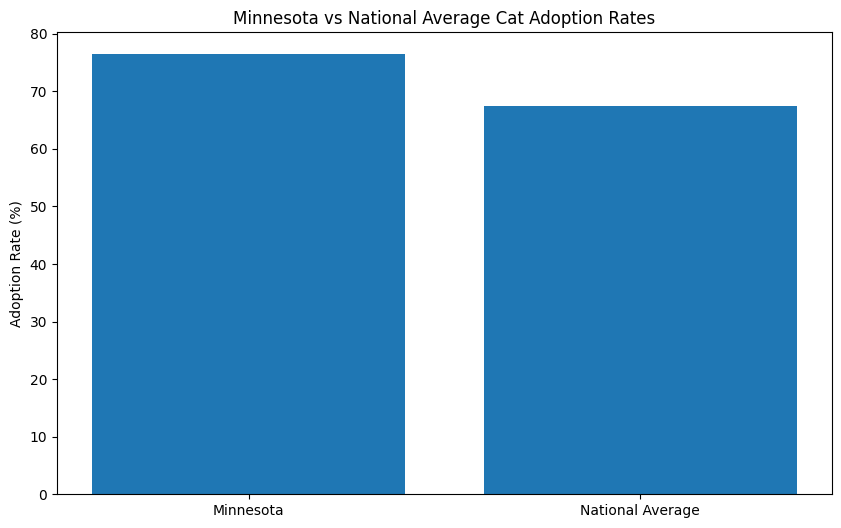

67.49461557835956

In [16]:
#MN cat adoption rate compare to national average
state_rates = shelter_data.groupby('State')['Cat Adoption Rate'].mean()
mn_rate = state_rates['MN']
avg_rate = state_rates.mean()

plt.figure(figsize=(10, 6))
plt.bar(['Minnesota', 'National Average'], [mn_rate, avg_rate])
plt.title("Minnesota vs National Average Cat Adoption Rates")
plt.ylabel("Adoption Rate (%)")
plt.show()

mn_rate
avg_rate

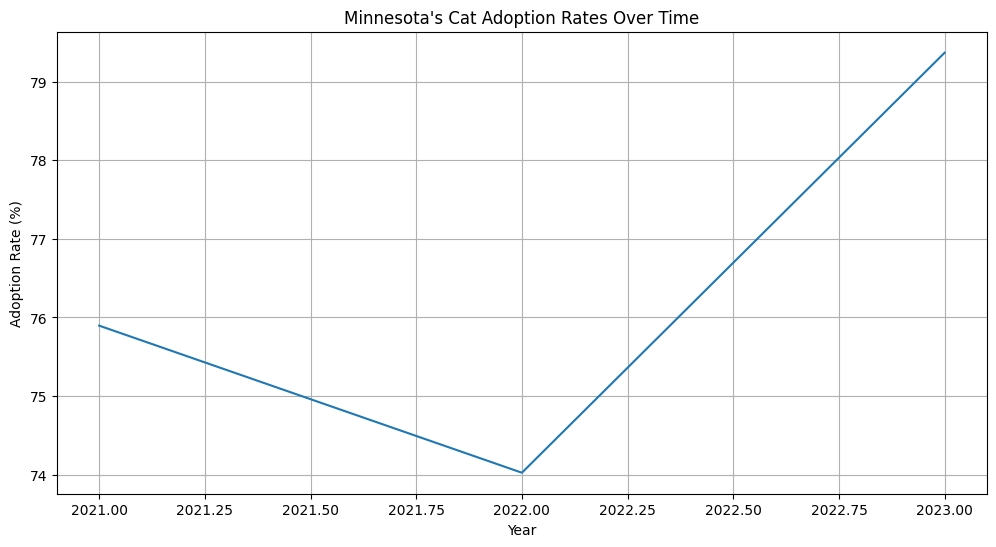

In [9]:
#MN cat adoption rates overtime (3 year period)
mn_rates_over_time = mn_data.groupby('Year')['Cat Adoption Rate'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mn_rates_over_time.index, mn_rates_over_time.values)
plt.title("Minnesota's Cat Adoption Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Adoption Rate (%)")
plt.grid(True)
plt.show()

In [10]:
#MN raking among all states for cat adoptions 
state_ranks = state_rates.rank(ascending=False)
mn_rank = state_ranks['MN']
print(f"Minnesota's ranking for cat adoptions: {mn_rank:.0f} out of {len(state_ranks)}")

Minnesota's ranking for cat adoptions: 13 out of 51


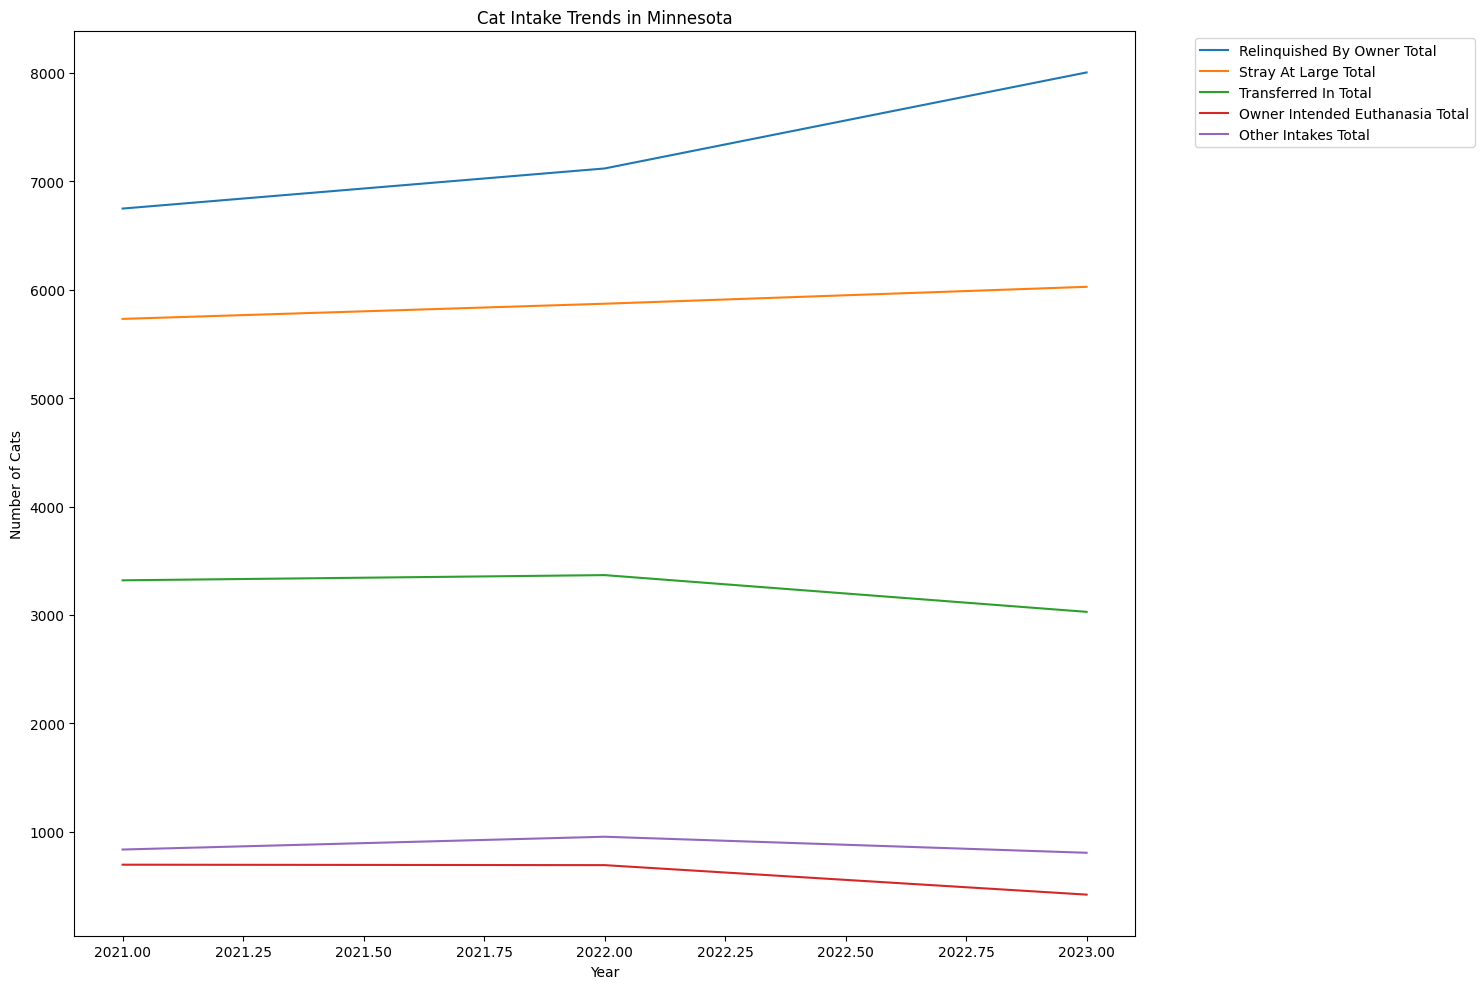

,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline
Year,,,,,
2021,6749,5731,3319,695,835
2022,7119,5871,3367,691,953
2023,8005,6027,3028,419,805


In [17]:
#Intake trends in MN 
intake_columns = ['Intake - Relinquished By Owner Total-Feline', 
                  'Intake - Stray At Large Total-Feline', 
                  'Intake - Transferred In Total-Feline',
                  'Intake - Owner Intended Euthanasia Total-Feline',
                  'Intakes - Other Intakes Total-Feline']

mn_intake = mn_data.groupby('Year')[intake_columns].sum()

plt.figure(figsize=(15, 10))
for column in intake_columns:
    plt.plot(mn_intake.index, mn_intake[column], label=column.split('-')[1].strip())

plt.title("Cat Intake Trends in Minnesota")
plt.xlabel("Year")
plt.ylabel("Number of Cats")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

mn_intake

In [14]:
#Last year statistics for MN 
latest_year = mn_data['Year'].max()
latest_data = mn_data[mn_data['Year'] == latest_year].iloc[0]

print(f"\nLatest Statistics for Cats in Minnesota ({latest_year}):")
print(f"Total Intakes: {sum(latest_data[col] for col in intake_columns):.0f}")
print(f"Total Adoptions: {latest_data['Live Outcome - Adoption Total-Feline']:.0f}")
print(f"Adoption Rate: {latest_data['Cat Adoption Rate']:.2f}%")



Latest Statistics for Cats in Minnesota (2023):
Total Intakes: 18284
Total Adoptions: 14512
Adoption Rate: 79.37%
